In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [4]:
dataset = pd.read_csv('50_Startups.csv')

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
print('There are',dataset.shape[0],'rows and',dataset.shape[1],'columns in the dataset')

There are 50 rows and 4 columns in the dataset


In [9]:
print('There are', dataset.duplicated().sum(),'duplicate values in the dataset')

There are 0 duplicate values in the dataset


In [10]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [12]:
c=dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


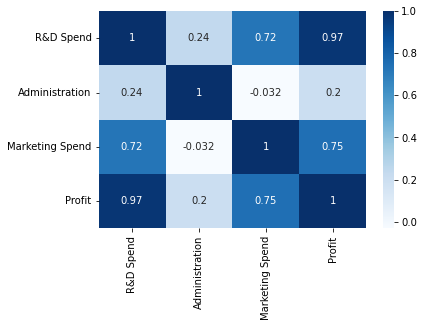

In [15]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

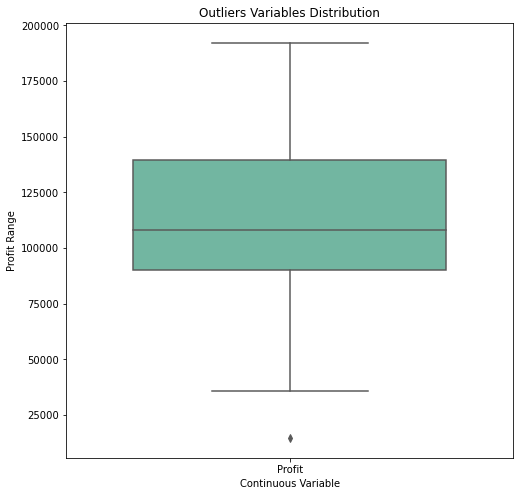

In [16]:
outliers = ['Profit']
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data = dataset[outliers], orient='v', palette='Set2', width=0.7)
plt.title('Outliers Variables Distribution')
plt.ylabel('Profit Range')
plt.xlabel('Continuous Variable')
plt.show()

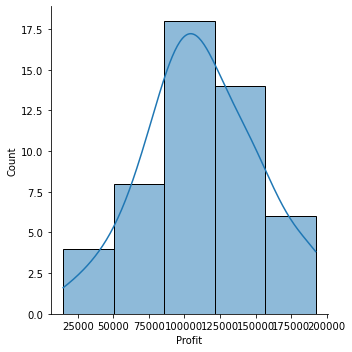

In [17]:
sns.displot(dataset['Profit'], bins=5 ,kde= True)
plt.show()

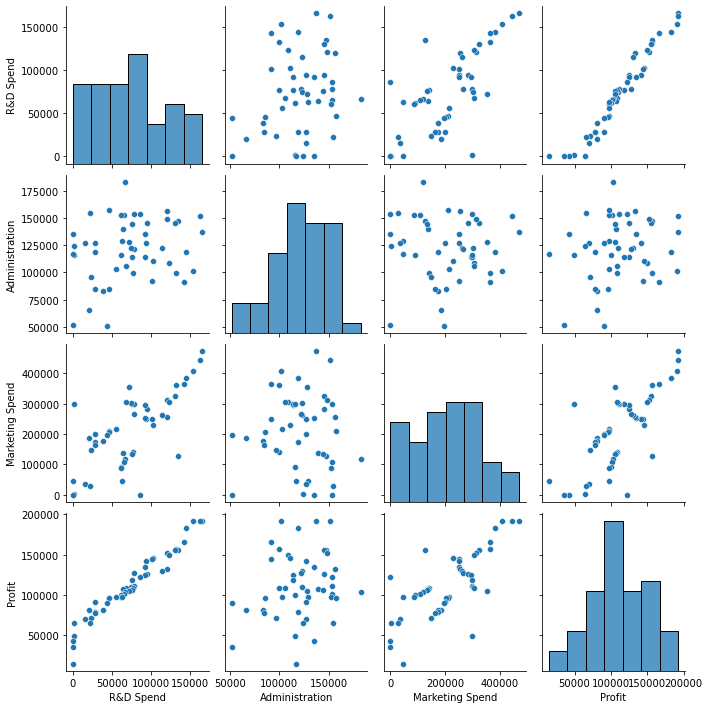

In [18]:
sns.pairplot(dataset)
plt.show()

In [19]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68],
       [119943.24, 156547.42, 256512.92],
       [  1000.23, 124153.04,   1903.93],
       [   542.05,  51743.15,      0.  ],
       [ 65605.48, 153032.06, 107138.38],
       [114523.61, 122616.84, 261776.23],
       [ 61994.48, 115641.28,  91131.24],
       [ 63408.86, 129219.61,  46085.25],
       [ 78013.11, 121597.55, 264346.06],
       [ 23640.93,  96189.63, 148001.11],
       [ 76253.86, 113867.3 , 298664.47],
       [ 15505.73, 127382.3 ,  35534.17],
       [120542.52, 148718.95, 311613.29],
       [ 91992.39, 135495.07, 252664.93],
       [ 64664.71, 139553.16, 137962.62],
       [131876.9 ,  99814.71, 362861.36],
       [ 94657.16, 145077.58, 282574.31],
       [ 28754.33, 118546.05, 172795.67],
       [     0.  , 116983.8 ,  45173.06],
       [162597.7 , 151377.59, 443898.53],
       [ 93863.75, 127320.38, 249839.44],
       [ 44069.95,  51283.14, 197029.42],
       [ 77044.01,  99281.34, 140574.81],
       [134615.46, 147198.87, 1277

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
('Model has been trained successfully')

'Model has been trained successfully'

In [22]:
y_pred = model.predict(x_test)
y_pred

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

In [23]:
testing_data_model_score = model.score(x_test,y_test)
testing_data_model_score

0.9355188337118218

In [24]:
df =  pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual value':y_test.flatten()})
df

,Predicted value,Actual value
0,104054.442939,103282.38
1,132719.345970,144259.40
2,133640.268309,146121.95
3,72294.769115,77798.83
4,179685.622278,191050.39
5,114508.975720,105008.31
6,66305.230699,81229.06
7,98297.693266,97483.56
8,114277.918949,110352.25
9,169112.360957,166187.94


In [25]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_pred,y_test)
print('R2 score of the Model is',r2_score)

R2 score of the Model is 0.9341560653448713


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print('Mean squared error of the Model is ',mse)

Mean squared error of the Model is  62240269.84291519


In [27]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
('Root mean squared error of the Model is',rmse)

('Root mean squared error of the Model is', 7889.2502712814985)

In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
('Mean absolute error of the model is',mae)

('Mean absolute error of the model is', 6489.660170486648)